In [1]:
import numpy as np
import temp as mz
maze = np.array([[0, 0, 1, 0, 0, 0, 0, 0, 0],
                 [0, 0, 1, 0, 0, 0, 1, 0, 0], 
                 [0, 0, 1, 0, 0, 0, 1, 1, 0],
                 [0, 0, 1, 0, 0, 0, 1, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 1, 1, 1, 1, 1, 1, 1, 0],
                 [0, 0, 0, 0, 0, 0, 1, 2, 0]])
#mz.draw_maze(maze)
env = mz.Maze(maze, minotaur_moves=4)


(0, 0, 0, 0) [(0, 0, 0, 0)] [-1.  0.  0.  0.  0.]
(0, 0, 0, 0) [(0, 0, 0, 0)] [  -1. -100.    0.    0.    0.]
(0, 0, 0, 0) [(0, 0, 0, 0)] [  -1. -100. -100.    0.    0.]
(0, 0, 0, 0) [(0, 0, 0, 0)] [  -1. -100. -100. -100.    0.]
(0, 0, 0, 0) [(0, 0, 0, 0)] [  -1. -100. -100. -100. -100.]


In [2]:
print(env.rewards)

[[  -1. -100. -100. -100. -100.]
 [   0. -100.    0. -100.    0.]
 [   0. -100.    0. -100.    0.]
 ...
 [   0.    2. -100.    0. -100.]
 [   0.    2. -100.    0. -100.]
 [  -1. -100. -100. -100. -100.]]


In [9]:
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon);

policy at end position [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
policy at end position [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
policy at end position [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
policy at end position [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
policy at end position [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
policy at end position [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
policy at end position [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
policy at end position [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
policy at end position [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
policy at end position [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
policy at end position [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
policy at end position [0. 0. 0.

In [4]:
list1 = ["1", "2"]
list2 = (1,2)
dict1 = {list2:5}
print(env.rewards.shape)
print(env.map[(0,0,6,6)])
print(env.rewards[60,:])
print(env.rewards[env.map[0,1,6,6]])
print(env.rewards[env.map[1,0,6,6]])
print(env.actions)



(2961, 5)
60
[   0. -100.    0. -100.    0.]
[   0.    0. -100. -100.    0.]
[   0. -100.    0.    0.    0.]
{0: (0, 0), 1: (0, -1), 2: (0, 1), 3: (-1, 0), 4: (1, 0)}


In [5]:
print(env.map[(6,8,0,0)])#endpos
print(env.rewards[2898,:]) 
a = [-4, 10000, -100, -4, -100]
print(np.argmax(a,0))

2898
[   0.    2. -100.    0. -100.]
1


In [6]:
# Simulate the shortest path starting from position A
method = 'DynProg';
start  = (0, 0, 6, 5);
path = env.simulate(start, policy, method);


In [7]:
print(path)

[(0, 0, 6, 5), (0, 0, 5, 5), (0, 0, 5, 5), (0, 0, 5, 5), (0, 0, 5, 4), (0, 0, 4, 4), (0, 0, 4, 4), (0, 0, 4, 5), (0, 0, 4, 5), (0, 0, 4, 5), (0, 0, 4, 4), (0, 0, 3, 4), (0, 0, 3, 4), (0, 0, 2, 4), (0, 0, 2, 3), (0, 0, 1, 3), (0, 0, 1, 4), (0, 0, 0, 4), (0, 0, 0, 5), (0, 0, 0, 6), (0, 0, 0, 6)]


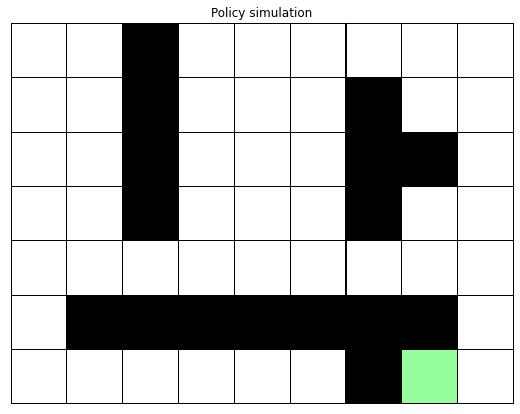

In [10]:
mz.animate_solution(maze, path)
#mz.draw_maze(maze)